In [3]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt

In [15]:
dir = '/glade/scratch/djk2120/clm50d30wspinsp_US-UMB_I1PtClm50SpGs/run/'
fil = 'clm50d30wspinsp_US-UMB_I1PtClm50SpGs.clm2.h1.1999-01-01-00000.nc'
f = dir+fil
ds = xr.open_dataset(f)
ds

<xarray.Dataset>
Dimensions:       (hist_interval: 2, levdcmp: 1, levgrnd: 25, levlak: 10, levsoi: 20, lndgrid: 1, nvegwcs: 4, time: 70129)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 ... 28.870724 41.998436
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.325 44.775
  * levdcmp       (levdcmp) float32 1.0
  * time          (time) datetime64[ns] 1999-01-01 ... 2007-01-01
Dimensions without coordinates: hist_interval, levsoi, lndgrid, nvegwcs
Data variables:
    mcdate        (time) int32 ...
    mcsec         (time) int32 ...
    mdcur         (time) int32 ...
    mscur         (time) int32 ...
    nstep         (time) int32 ...
    time_bounds   (time, hist_interval) datetime64[ns] ...
    date_written  (time) |S16 ...
    time_written  (time) |S16 ...
    lon           (lndgrid) float32 ...
    lat           (lndgrid) float32 ...
    area          (lndgrid) float32 ...
    landfrac      (lndgrid) float32 ...
    landmask      (lndgrid) float64 

Text(0.5,1,'Monthly means')

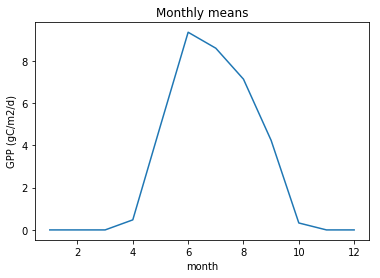

In [13]:
xf = 24*60*60*12/1e6
(xf*ds['FPSN']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.ylabel('GPP (gC/m2/d)')
plt.title('Monthly means')

Text(0.5,1,'Monthly means')

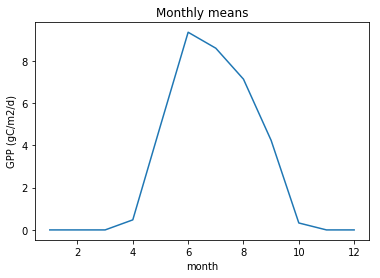

In [67]:
xf = 24*60*60*12/1e6
(xf*ds['FPSN']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.ylabel('GPP (gC/m2/d)')
plt.title('Monthly means')

Text(0.5,1,'Monthly means')

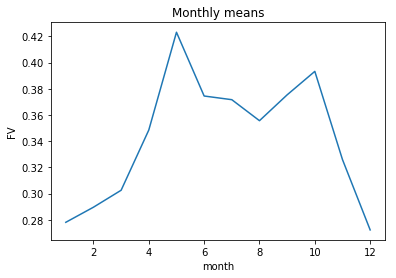

In [69]:
xf = 24*60*60*12/1e6
(xf*ds['FV']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.title('Monthly means')

Text(0.5,1,'Monthly means')

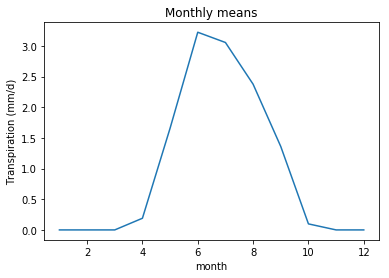

In [23]:
xf = 24*60*60/2.5e6
(xf*ds['FCTR']).groupby('time.month').mean(dim=xr.ALL_DIMS).plot()
plt.ylabel('Transpiration (mm/d)')
plt.title('Monthly means')

Text(0.5,1,'July diurnal mean')

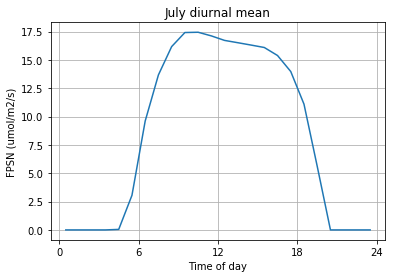

In [73]:
ix = ds.swap_dims({'time':'mcsec'})['time.month']==7
lwp = xf*(ds.swap_dims({'time':'mcsec'})['FPSN'][ix]
               .groupby('mcsec').mean(dim=xr.ALL_DIMS).values)
lwp_diurnal = np.zeros(24)
lwp_diurnal[:17] = lwp[7:]
lwp_diurnal[17:] = lwp[:7]

plt.plot(0.5+np.arange(24),lwp_diurnal)
plt.xticks(6*np.arange(5))
plt.grid()
plt.ylabel('FPSN (umol/m2/s)')
plt.xlabel('Time of day')
plt.title('July diurnal mean')

Text(0.5,1,'July diurnal mean')

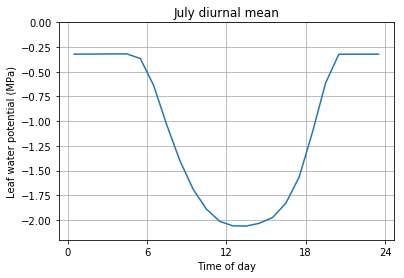

In [59]:
xf = 1/101972
ix = ds.swap_dims({'time':'mcsec'})['time.month']==7
lwp = xf*(ds.swap_dims({'time':'mcsec'})['VEGWP'][ix,0]
               .groupby('mcsec').mean(dim=xr.ALL_DIMS).values)
lwp_diurnal = np.zeros(24)
lwp_diurnal[:17] = lwp[7:]
lwp_diurnal[17:] = lwp[:7]

plt.plot(0.5+np.arange(24),lwp_diurnal)
plt.xticks(6*np.arange(5))
plt.ylim([-2.2,0])
plt.grid()
plt.ylabel('Leaf water potential (MPa)')
plt.xlabel('Time of day')
plt.title('July diurnal mean')

Text(0.5,1,'July diurnal mean')

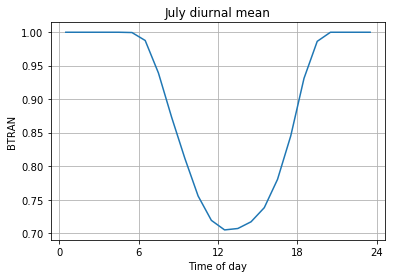

In [62]:
ix = ds.swap_dims({'time':'mcsec'})['time.month']==7
lwp = (ds.swap_dims({'time':'mcsec'})['BTRAN'][ix]
               .groupby('mcsec').mean(dim=xr.ALL_DIMS).values)
lwp_diurnal = np.zeros(24)
lwp_diurnal[:17] = lwp[7:]
lwp_diurnal[17:] = lwp[:7]

plt.plot(0.5+np.arange(24),lwp_diurnal)
plt.xticks(6*np.arange(5))

plt.grid()
plt.ylabel('BTRAN')
plt.xlabel('Time of day')
plt.title('July diurnal mean')

Text(0.5,1,'multi-year mean at daily resolution')

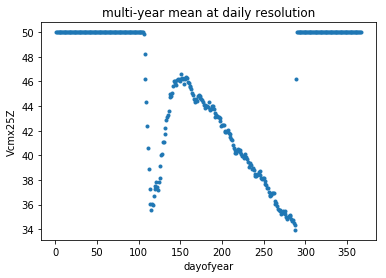

In [66]:
ds['Vcmx25Z'].groupby('time.dayofyear').mean(dim=xr.ALL_DIMS).plot.line('.')
plt.title('multi-year mean at daily resolution')